In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from os import getcwd
from os import listdir
from matplotlib.image import imread
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import random

import numpy as np
from tensorflow.keras import *
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path='C:/Users/edbar/Desktop/Illinois Institute of Technology/1 er Semestre/Deep Learning/devoirs/HW4/essais/archive/dog vs cat/dataset/x_training_set/cats/cat.1.jpg'
cath = cv2.imread(path)

In [3]:
def enr_des_donnees(path,path_test, label):
    x_train_image = []
    x_train_label = []
    test_image = []
    test_label = []
    for i in os.listdir(path):
        img = cv2.imread(path + '/' + i)
        res = cv2.resize(img, dsize=(128,128),interpolation=cv2.INTER_CUBIC) 
        gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY) # Converting to grayscale
        x_train_image.append(gray)
        x_train_label.append(label)
    for j in os.listdir(path_test):
        img2 = cv2.imread(path_test + '/' + j)
        res2 = cv2.resize(img, dsize = (128,128), interpolation = cv2.INTER_CUBIC)
        gray2 = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
        test_image.append(gray2)
        test_label.append(label)
    return x_train_image, x_train_label, test_image, test_label

In [4]:
x_train = []
x_test = []
y_train = []
y_test = []


#train = []
#test = []
#trainlabel = []
#testlabel = []


#cats
train_image, train_label, test_image, test_label = enr_des_donnees('C:/Users/edbar/Desktop/Illinois Institute of Technology/1 er Semestre/Deep Learning/devoirs/HW4/essais/archive/dog vs cat/dataset/training_set/cats','C:/Users/edbar/Desktop/Illinois Institute of Technology/1 er Semestre/Deep Learning/devoirs/HW4/essais/archive/dog vs cat/dataset/test_set/cats', 0)
x_train.extend(train_image)
y_train.extend(train_label)
x_test.extend(test_image)
y_test.extend(test_label)

#dogs 
train_image, train_label, test_image, test_label = enr_des_donnees('C:/Users/edbar/Desktop/Illinois Institute of Technology/1 er Semestre/Deep Learning/devoirs/HW4/essais/archive/dog vs cat/dataset/training_set/dogs','C:/Users/edbar/Desktop/Illinois Institute of Technology/1 er Semestre/Deep Learning/devoirs/HW4/essais/archive/dog vs cat/dataset/test_set/dogs', 1)
x_train.extend(train_image)
y_train.extend(train_label)
x_test.extend(test_image)
y_test.extend(test_label)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [5]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

4000
4000
600
600


In [6]:
x_val=x_train[:400]
x_train=x_train[400:]

y_val=y_train[:400]
y_train=y_train[400:]

In [7]:
print(len(x_val))
print(len(x_train))
print(len(x_test))
print("")
print(len(y_val))
print(len(y_train))
print(len(y_test))

400
3600
600

400
3600
600


In [8]:
x_train = x_train.reshape(x_train.shape[0], 128,128,1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 128, 128, 1).astype('float32')
x_val=x_val.reshape(x_val.shape[0], 128,128,1).astype('float32')
x_train = x_train/255.0
x_test = x_test/255.0
x_val=x_val/255.0

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 128)     

In [22]:
model.compile(loss="binary_crossentropy", 
              optimizer=optimizers.RMSprop(learning_rate=1e-4), 
              metrics=["accuracy"])

In [23]:
history = model.fit(x_train, 
                    y_train,
                    epochs = 20,
                    validation_data = (x_val, y_val),
                    verbose =1)

Epoch 1/20
113/113 [==============================] - 29s 254ms/step - loss: 0.6797 - accuracy: 0.5592 - val_loss: 0.8844 - val_accuracy: 0.0050
Epoch 2/20
113/113 [==============================] - 36s 316ms/step - loss: 0.6533 - accuracy: 0.6103 - val_loss: 0.6812 - val_accuracy: 0.5900
Epoch 3/20
113/113 [==============================] - 35s 313ms/step - loss: 0.6198 - accuracy: 0.6608 - val_loss: 0.6602 - val_accuracy: 0.6250
Epoch 4/20
113/113 [==============================] - 35s 314ms/step - loss: 0.5873 - accuracy: 0.6883 - val_loss: 1.0317 - val_accuracy: 0.2375
Epoch 5/20
113/113 [==============================] - 42s 370ms/step - loss: 0.5541 - accuracy: 0.7172 - val_loss: 0.9303 - val_accuracy: 0.4225
Epoch 6/20
113/113 [==============================] - 44s 388ms/step - loss: 0.5253 - accuracy: 0.7406 - val_loss: 0.5164 - val_accuracy: 0.7625
Epoch 7/20
113/113 [==============================] - 43s 377ms/step - loss: 0.4985 - accuracy: 0.7631 - val_loss: 1.4539 - val_ac

In [25]:
model.evaluate(x_test, y_test, batch_size=3, verbose=2)

200/200 - 2s - loss: 0.0619 - accuracy: 1.0000 - 2s/epoch - 12ms/step


[0.06186976656317711, 1.0]

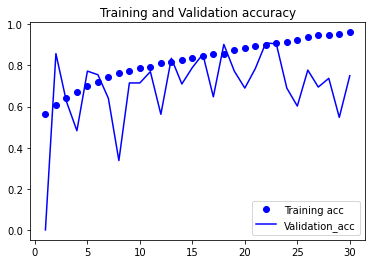

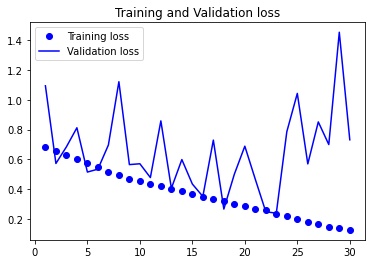

In [70]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(acc)+1)

#plot accuracy:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation_acc')
plt.title('Training and Validation accuracy')
plt.legend()

#plot loss:
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [71]:
model.save('HW4_question1.hdf5')

# Evaluate and tune hyper parameters

epoch=5; batch_size=10

In [10]:
model.compile(loss="binary_crossentropy", 
              optimizer=optimizers.RMSprop(learning_rate=1e-4), 
              metrics=["accuracy"])

history = model.fit(x_train, 
                    y_train,
                    epochs = 5,
                    validation_data = (x_val, y_val),
                    verbose =1)

Epoch 1/5
113/113 [==============================] - 52s 431ms/step - loss: 0.6807 - accuracy: 0.5581 - val_loss: 0.7693 - val_accuracy: 0.0425
Epoch 2/5
113/113 [==============================] - 34s 305ms/step - loss: 0.6530 - accuracy: 0.6181 - val_loss: 0.6458 - val_accuracy: 0.7050
Epoch 3/5
113/113 [==============================] - 36s 321ms/step - loss: 0.6220 - accuracy: 0.6450 - val_loss: 0.7192 - val_accuracy: 0.5750
Epoch 4/5
113/113 [==============================] - 37s 324ms/step - loss: 0.5882 - accuracy: 0.6817 - val_loss: 0.8397 - val_accuracy: 0.4350
Epoch 5/5
113/113 [==============================] - 38s 339ms/step - loss: 0.5583 - accuracy: 0.7133 - val_loss: 0.8688 - val_accuracy: 0.4625


In [11]:
model.evaluate(x_test, y_test, batch_size=10, verbose=2)

60/60 - 2s - loss: 0.5359 - accuracy: 0.5000 - 2s/epoch - 28ms/step


[0.5359047055244446, 0.5]

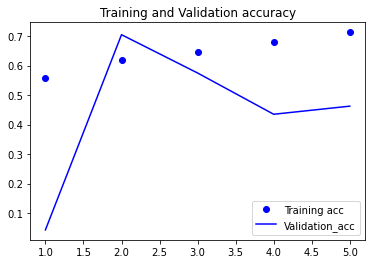

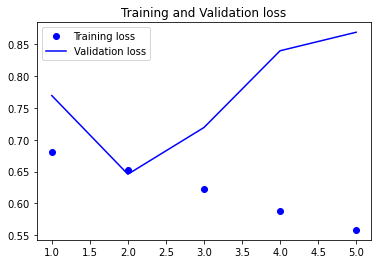

In [12]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(acc)+1)

#plot accuracy:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation_acc')
plt.title('Training and Validation accuracy')
plt.legend()

#plot loss:
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

epoch=10, batch size=5

In [13]:
model.compile(loss="binary_crossentropy", 
              optimizer=optimizers.RMSprop(learning_rate=1e-4), 
              metrics=["accuracy"])

history = model.fit(x_train, 
                    y_train,
                    epochs = 10,
                    validation_data = (x_val, y_val),
                    verbose =1)

Epoch 1/10
113/113 [==============================] - 31s 274ms/step - loss: 0.5327 - accuracy: 0.7314 - val_loss: 0.6224 - val_accuracy: 0.6700
Epoch 2/10
113/113 [==============================] - 36s 321ms/step - loss: 0.5094 - accuracy: 0.7411 - val_loss: 0.5519 - val_accuracy: 0.7200
Epoch 3/10
113/113 [==============================] - 36s 323ms/step - loss: 0.4879 - accuracy: 0.7556 - val_loss: 0.7282 - val_accuracy: 0.5950
Epoch 4/10
113/113 [==============================] - 37s 324ms/step - loss: 0.4693 - accuracy: 0.7814 - val_loss: 0.9542 - val_accuracy: 0.4925
Epoch 5/10
113/113 [==============================] - 37s 325ms/step - loss: 0.4486 - accuracy: 0.7931 - val_loss: 0.7021 - val_accuracy: 0.6275
Epoch 6/10
113/113 [==============================] - 37s 330ms/step - loss: 0.4330 - accuracy: 0.7994 - val_loss: 0.9154 - val_accuracy: 0.5400
Epoch 7/10
113/113 [==============================] - 36s 322ms/step - loss: 0.4125 - accuracy: 0.8161 - val_loss: 0.6595 - val_ac

In [14]:
model.evaluate(x_test, y_test, batch_size=10, verbose=2)

60/60 - 2s - loss: 0.5374 - accuracy: 0.5000 - 2s/epoch - 27ms/step


[0.5374429821968079, 0.5]

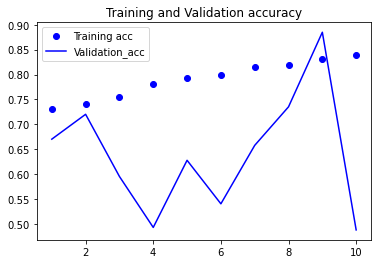

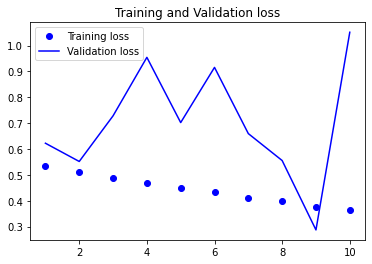

In [15]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(acc)+1)

#plot accuracy:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation_acc')
plt.title('Training and Validation accuracy')
plt.legend()

#plot loss:
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

# Visualize activation of some of the convolution layers:

In [49]:

from keras.applications.vgg16 import VGG16
model = VGG16()
print(model.summary())

553467096/553467096 [==============================] - 20s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [50]:
model.compile(loss="binary_crossentropy", 
              optimizer=optimizers.RMSprop(learning_rate=1e-4), 
              metrics=["accuracy"])

In [51]:
history = model.fit(x_train, 
                    y_train,
                    epochs = 1,
                    validation_data = (x_val, y_val),
                    verbose =1)

ValueError: in user code:

    File "C:\Users\edbar\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\edbar\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\edbar\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\edbar\anaconda3\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\edbar\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\edbar\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "vgg16" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 128, 128, 1)


In [56]:
x_train = x_train.reshape(x_train.shape[0], 128,128,3).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 128, 128, 3).astype('float32')
x_val=x_val.reshape(x_val.shape[0], 128,128,3).astype('float32')
x_train = x_train/255.0
x_test = x_test/255.0
x_val=x_val/255.0

ValueError: cannot reshape array of size 58982400 into shape (3600,128,128,3)